- Write a computer program to integrate the linear ODE
\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = - \lambda y
\end{equation}
using the **FORWARD** in **TIME** scheme in the formula 
\begin{equation}
y^{n+1} = (1 - \lambda \Delta t) y^n
\end{equation}
with $\lambda = 0.1 s^{-1}$ and $y(0) = 1.0$ and compare the solution with the exact solution for three cases:

    - $\Delta t < \frac{1}{\lambda}$
    - $\frac{1}{\lambda} < \Delta t < \frac{2}{\lambda}$ 
    - $\Delta > \frac{2}{\lambda}$

    Plot $\mathrm{e}^{n} = y^{n} - y(t_n)$ vs time $t_n$ .

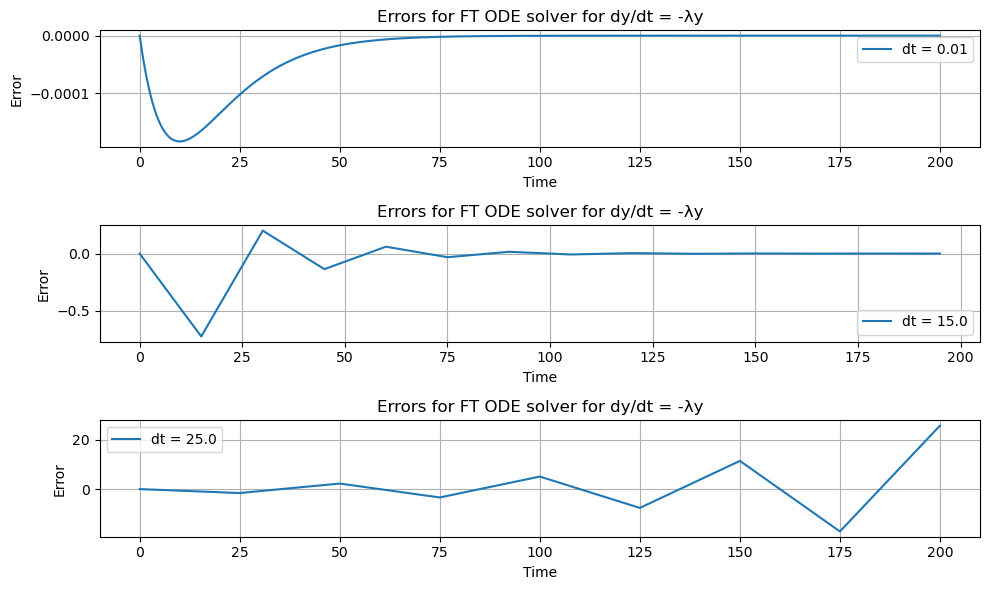

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE function
def integrate_ft(dt, lam):
    return 1 - lam * dt

# Exact solution of the ODE
def exact_solution(t, y0, lam):
    return y0 * np.exp(-lam * t)

# Forward Finite Difference method
def forward_euler(y0, lam, dt, end_time):
    num_steps = int(end_time / dt)
    y_values = [y0]
    t_values = [0]
    for i in range(1, num_steps + 1):
        y_next = y_values[-1] * integrate_ft(dt, lam)
        y_values.append(y_next)
        t_values.append(i * dt)
    return t_values, y_values

# Parameters
lam = 0.1
y0 = 1.0
end_time = 200

# Different time step sizes
dt_values = [0.01, 15.0, 25.0]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i, dt in enumerate(dt_values, 1):
    t_values, y_values = forward_euler(y0, lam, dt, end_time)
    exact_values = exact_solution(np.array(t_values), y0, lam)
    error = np.array(y_values) - exact_values
    
    plt.subplot(len(dt_values), 1, i)  # Create a new subplot for each dt value
    plt.plot(t_values, error, label=f'dt = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.title(f'Errors for FT ODE solver for dy/dt = -λy')
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Adjust subplot parameters to give specified padding.
#plt.savefig('FT.png') #To save the plot
plt.show()

- Show that the **BACKWARD** in time different scheme
\begin{equation}
    \frac{y^{n} - y^{n-1}}{\Delta t} = - \lambda y^{n}
\end{equation}
is always stable for the differential equation in
\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = -\lambda y
\end{equation}
repeating the stability analysis we have done for the **FORWARD** in time difference scheme.

**HINT: Start substituting the generic form of the solution**
\begin{equation}
y^{n} = A^{p}
\end{equation}

**Solution:**
Let start with the formula of **BACKWARD** scheme
\begin{equation}
    \frac{y^{n} - y^{n-1}}{\Delta t} = - \lambda y^{n}.
\end{equation}
Performing some manipulation, we can arrive at
\begin{equation}
    y^{n-1} = y^{n} (1 + \lambda \Delta t).
\end{equation}
Using the generic form of the solution $y^{n} = A^{p}$, we can get
\begin{equation}
    A = \frac{1}{1 + \lambda \Delta t}.
\end{equation}
Since $\lambda$ and $\Delta t$ is always positive ($+$), hence $(1 + \lambda \Delta t) > 1$. Therefore, $|A| < 1$ which means that the **BACKWARD** in time different scheme is **ALWAYS STABLE**.

**Remark: The numerical scheme is stable if: $|A| \leq 1$.**

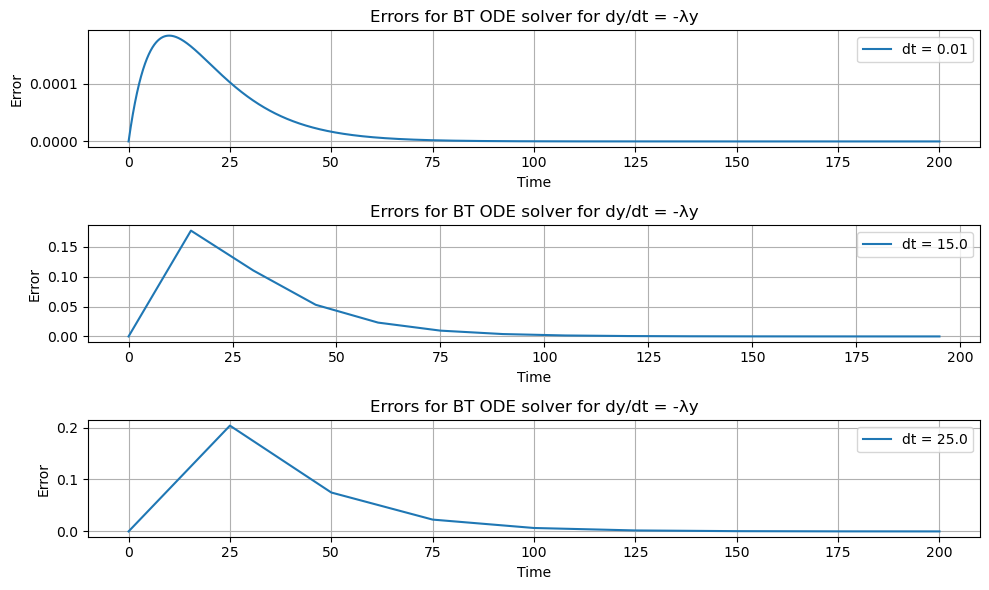

In [9]:
# Define the ODE function
def integrate_bt(dt, lam):
     return 1.0/(1.0 + lam * dt)

# Exact solution of the ODE
def exact_solution(t, y0, lam):
    return y0 * np.exp(-lam * t)

# Backward Finite Difference method
def backward_euler(y0, lam, dt, end_time):
    num_steps = int(end_time / dt)
    y_values = [y0]
    t_values = [0.0]
    for i in range(1, num_steps + 1):
        y_next = y_values[-1] * integrate_bt(dt, lam)
        y_values.append(y_next)
        t_values.append(i * dt)
    return t_values, y_values

# Parameters
lam = 0.1
y0 = 1.0
end_time = 200

# Different time step sizes
dt_values = [0.01, 15.0, 25.0]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i, dt in enumerate(dt_values, 1):
    t_values, y_values = backward_euler(y0, lam, dt, end_time)
    exact_values = exact_solution(np.array(t_values), y0, lam)
    error = np.array(y_values) - exact_values
    
    plt.subplot(len(dt_values), 1, i)  # Create a new subplot for each dt value
    plt.plot(t_values, error, label=f'dt = {dt}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.title(f'Errors for BT ODE solver for dy/dt = -λy')
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Adjust subplot parameters to give specified padding.
#plt.savefig('BT.png') #To save the plot
plt.show()